In [186]:
import Convex
using LinearAlgebra, Plots
include("z3_utility.jl")
include("smc.jl")

solve! (generic function with 5 methods)

In [187]:
# a problem where x has to be in a circle of radius √2 but outside a square of length 1
x = Variable(2, :Real)
constraints = NodeType[
    Convex.sumsquares(x) <= 2.0,
    (x[1] >= 1.0) ∨ (x[1] <= -1.0),
    (x[2] >= 1.0) ∨ (x[2] <= -1.0),
]
problem = SmcProblem(constraints)
solve!(problem)

optval -1.0959755686437498e-5


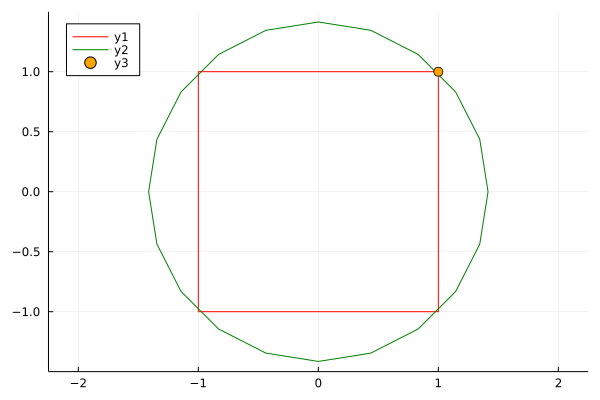

In [188]:
plot([-1,1,1,-1,-1], [-1,-1,1,1,-1], color=:red, aspect_ratio=:equal, legend=:topleft)
plot!(cos.(π.*(0:0.1:2)).*√2, sin.(π.*(0:0.1:2)).*√2, color=:green)
scatter!([x.value[1],], [x.value[2],], color=:orange, markersize=5)

In [189]:
println(Convex.norm(x.value), " ", √2)

1.4142182746781347 1.4142135623730951
